<a href="https://colab.research.google.com/github/cu-applied-math/SciML-Class/blob/main/Labs/lab06a_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 Computational Costs
In this part of the lab you will be aiming to estimate the computational cost of stepping functions
for:
- Gradient Descent: $$x_{i+1} = x_i - \alpha \nabla f(x_i)$$
- Newtons Method: $$x_{i+1} = x_i - H_f^{-1} \nabla f(x_i)$$  
In applications, we want to know how our algorithms scale,
but may not be able to analytically know how expensive each step is,
or we want to check that our analysis
matches with experimental results.

For this problem we will be effectively generating least squares problem (code provided), then taking one optimization step with each method.
$$f(x) = \tfrac{1}{2}\|Ax-b\|_2^2, \nabla f = A^T(Ax-b), H_f = (A^TA)^{-1}A^T(Ax-b)$$
This has a closed form solution, and in fact the newton step is equivalent to applying the closed form solution. In general, we do care about **Nonlinear** least squares problem.
$$f(x) = \tfrac{1}{2}\|G(x)-b\|_2^2, \nabla f = J_G^T(G(x)-b), H_f = H_G[(Ax-b]] + J_G^TJ_G$$
We are just generating linear least squares problems for computational ease.

## A. Compute the Cost Analytically
Similar to the homework compute the computational cost on paper, then we will compare this to our numerical results.

## B. Run an experiment to see if our analysis matches the data
For this problem, we give to inputs $N,M$ which are integers to two functions `foo1, foo2`. We want to estimate
how each function's cost scales as a function of those inputs (think $O(N^kM^l)$). Good functions to use would be
`time` to get wall times around function calls while calling the functions at various inputs. Then you can plot the results and possible pose least square problems to estimate the rates

- **hint**: log-scale may be important
- **hint**: perhaps fix one input to estimate the rate with the other


In [ ]:
import numpy as np
from time import time
from numpy.random import random, randn, rand
from numpy import sqrt
import matplotlib.pyplot as plt

In [ ]:
## Dont mess with thes
def buildLeastSquares(N, M, noise_level=1, debug=False):
  start = time()
  A = random((M,N))
  if debug: print(f'rand {time() - start}')
  start = time()
  np.fill_diagonal(A,10)
  if debug: print(f'diag reg {time() - start}')
  start = time()
  x = rand(N)
  b = A@x + noise_level*randn(M)
  if debug: print(f'b {time() - start}')
  return A, b
def gradDescentStep(x, A, b, step_sz=1):
  return x - step_sz * A.T@(A@x -b)
def newtonStep(x, A, b):
  return x - np.linalg.solve(A.T@A, A.T@(A@x - b))

In [ ]:

debug = True
base = 10
stop = 6
Ns = (10**np.arange(start=2.0,stop=4,step=0.25)).astype(int)
Ms = (10**np.arange(start=2.0,stop=5,step=0.25)).astype(int)
numN, numM = len(Ns), len(Ms)
gradTimes = np.zeros((numN,numM))
newtonTimes = np.zeros((numN,numM))
for n, N in enumerate(Ns):
    for m, M in enumerate(Ms):
        if M < N:
            # only want over determined (or determined systems)
            continue
        if debug: print(f'{N=}, {M=}\n')
        pass
        ## You should be running algos and timing things here


N=100, M=100

N=100, M=177

N=100, M=316

N=100, M=562

N=100, M=1000

N=100, M=1778

N=100, M=3162

N=100, M=5623

N=100, M=10000

N=100, M=17782

N=100, M=31622

N=100, M=56234

N=177, M=177

N=177, M=316

N=177, M=562

N=177, M=1000

N=177, M=1778

N=177, M=3162

N=177, M=5623

N=177, M=10000

N=177, M=17782

N=177, M=31622

N=177, M=56234

N=316, M=316

N=316, M=562

N=316, M=1000

N=316, M=1778

N=316, M=3162

N=316, M=5623

N=316, M=10000

N=316, M=17782

N=316, M=31622

N=316, M=56234

N=562, M=562

N=562, M=1000

N=562, M=1778

N=562, M=3162

N=562, M=5623

N=562, M=10000

N=562, M=17782

N=562, M=31622

N=562, M=56234

N=1000, M=1000

N=1000, M=1778

N=1000, M=3162

N=1000, M=5623

N=1000, M=10000

N=1000, M=17782

N=1000, M=31622

N=1000, M=56234

N=1778, M=1778

N=1778, M=3162

N=1778, M=5623

N=1778, M=10000

N=1778, M=17782

N=1778, M=31622

N=1778, M=56234

N=3162, M=3162

N=3162, M=5623

N=3162, M=10000

N=3162, M=17782

N=3162, M=31622

N=3162, M=56234

N=5623, M=5623



In [ ]:
## Plot the results in a way where you can see how the methods scale in N
## Estimate the exponential rates somehow...
# print(f'GradDesc is O(N^{...})')
# print(f'Newton is O(N^{...})')

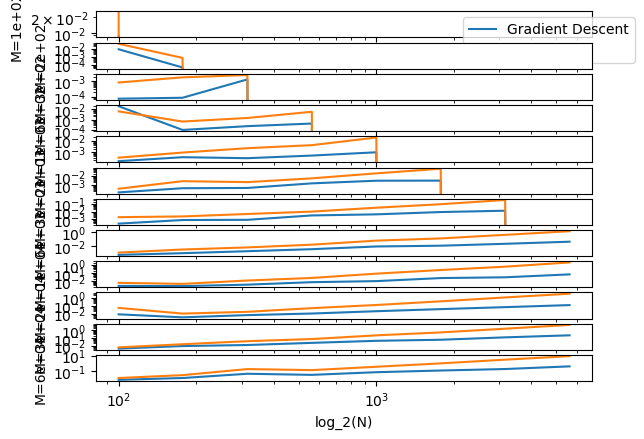

GradDesc is O(M^0.93285115687163
Newton is O(M^1.546522772902962


/var/folders/nd/t97qzzn5709_g3t64qkh7rj80000gp/T/ipykernel_46983/1231581400.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0]
/var/folders/nd/t97qzzn5709_g3t64qkh7rj80000gp/T/ipykernel_46983/1231581400.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0]


In [ ]:
## Plot the results in a way where you can see how the methods scale in M
## Estimate the exponential rates somehow...
# print(f'GradDesc is O(M^{...})')
# print(f'Newton is O(M^{...})')

In [ ]:
A.shape

(2, 12)